In [ ]:
import numpy as np
import cv2
from skimage.feature import hog
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

image_clear_path = "vespa_clear.jpg"
image_damage_path = "vespa_damage.jpg"

image_clear = cv2.imread(image_clear_path)
image_damage = cv2.imread(image_damage_path)
gray_clear = cv2.cvtColor(image_clear, cv2.COLOR_BGR2GRAY)
gray_damage = cv2.cvtColor(image_damage, cv2.COLOR_BGR2GRAY)

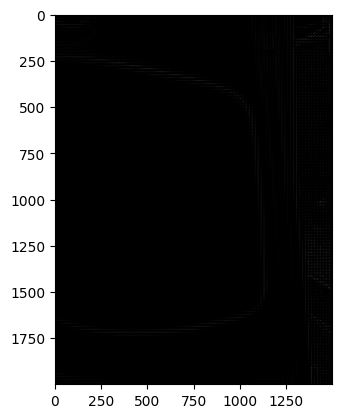

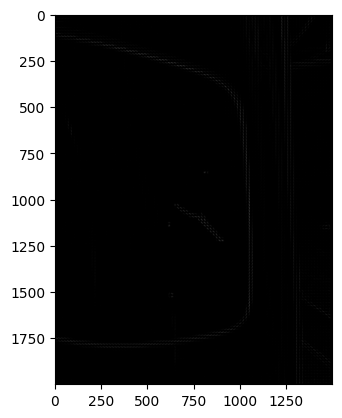

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

fd1, hog_image1 = hog(
    image_clear,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fd2, hog_image2 = hog(
    image_damage,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(2, 2),
    visualize=True,
    channel_axis=-1,
)

plt.imshow(hog_image1, cmap='gray')
plt.show()

plt.imshow(hog_image2, cmap='gray')
plt.show()

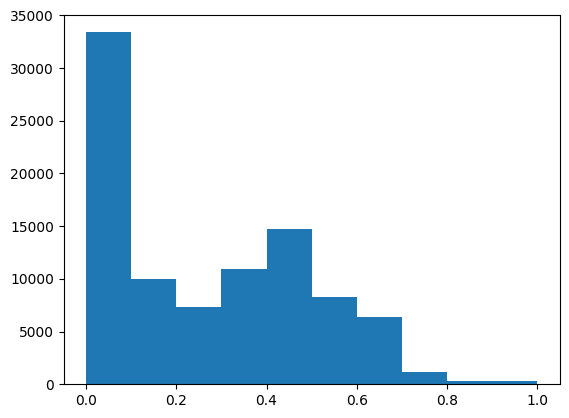

In [ ]:
plt.hist(fd1)
plt.show()

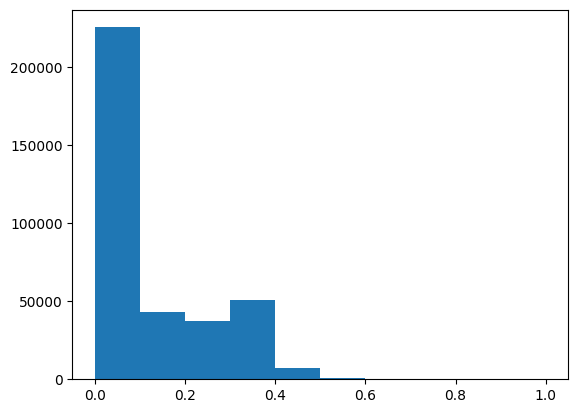

In [ ]:
plt.hist(fd2)
plt.show()

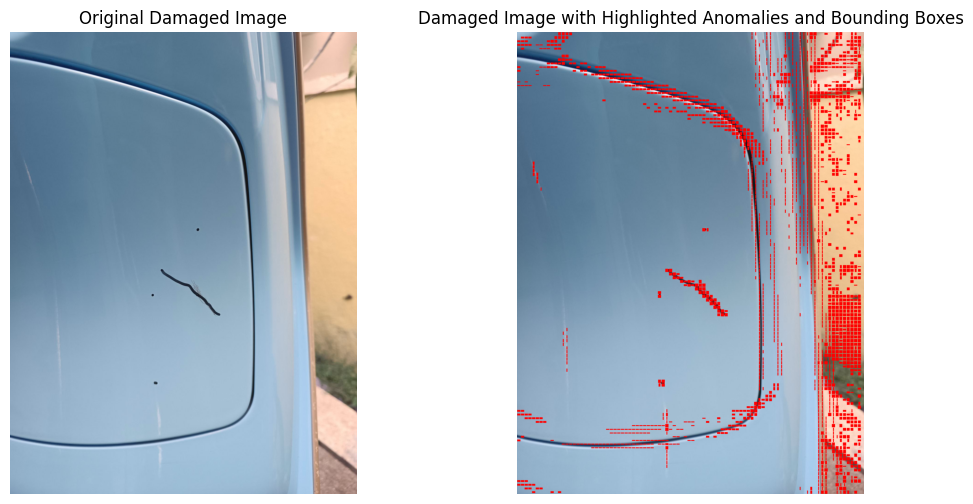

In [ ]:
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

threshold = 1
size_filter = 20

difference = np.abs(hog_image1 - hog_image2) > threshold

overlay = np.zeros_like(image_damage)
overlay[difference] = [255, 0, 0]

label_image = label(difference)
regions = regionprops(label_image)

highlighted_damage_with_boxes = np.copy(image_damage)

for region in regions:
    if region.area >= size_filter:
        minr, minc, maxr, maxc = region.bbox
        highlighted_damage_with_boxes[minr:maxr, minc:maxc] = [255, 0, 0]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_damage)
ax[0].set_title('Original Damaged Image')
ax[0].axis('off')

ax[1].imshow(highlighted_damage_with_boxes)
ax[1].set_title('Damaged Image with Highlighted Anomalies and Bounding Boxes')
ax[1].axis('off')

plt.show()

(-0.5, 1499.5, 1999.5, -0.5)

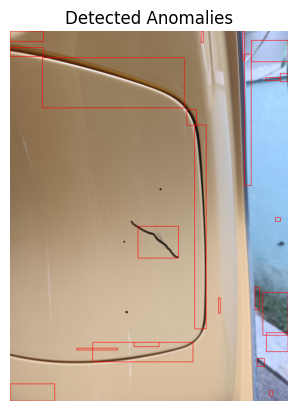

In [ ]:
difference = cv2.absdiff(gray_clear, gray_damage)

#parameters
threshold = 100
filter_area = 150
thresholding = cv2.THRESH_BINARY


_, thresh = cv2.threshold(difference, threshold, 255, thresholding)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output_image = image_damage.copy()
for contour in contours:
    if cv2.contourArea(contour) > filter_area:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

plt.title('Detected Anomalies')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

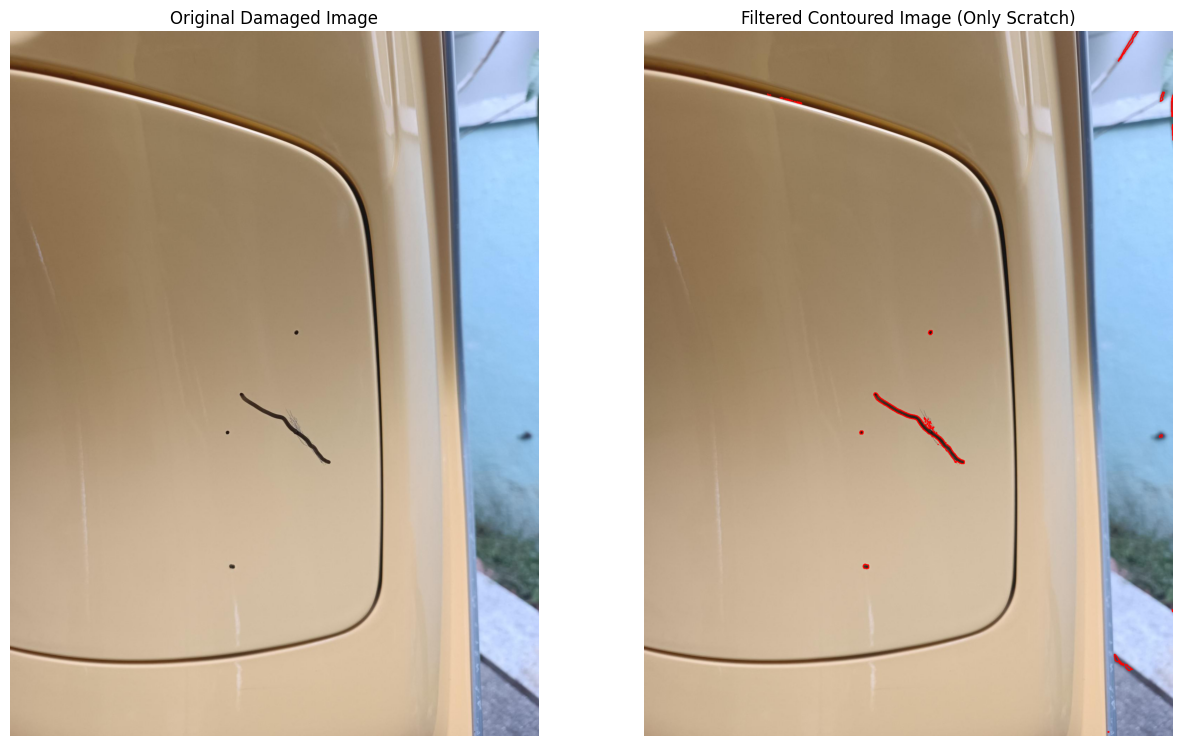

In [ ]:
gray_damage = cv2.cvtColor(img_damage, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
bottom_hat = cv2.morphologyEx(gray_damage, cv2.MORPH_BLACKHAT, kernel)

_, thresh = cv2.threshold(bottom_hat, 50, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = []
for contour in contours:
    if 0 < cv2.contourArea(contour) < 5000:
        filtered_contours.append(contour)

contoured_image_filtered = img_damage.copy()
cv2.drawContours(contoured_image_filtered, filtered_contours, -1, (0, 0, 255), 2)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(cv2.cvtColor(img_damage, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Damaged Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(contoured_image_filtered, cv2.COLOR_BGR2RGB))
axes[1].set_title('Filtered Contoured Image (Only Scratch)')
axes[1].axis('off')

plt.show()

In [ ]:
!wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938133-1629953189/tile.tar.xzm

--2024-07-01 08:17:08--  https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938133-1629953189/tile.tar.xzm
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 351279732 (335M) [application/x-xz]
Saving to: ‘tile.tar.xzm.1’

tile.tar.xzm.1      100%[===================>] 335.01M  29.0MB/s    in 12s     

2024-07-01 08:17:21 (27.4 MB/s) - ‘tile.tar.xzm.1’ saved [351279732/351279732]



In [ ]:
import tarfile

In [ ]:
tar = tarfile.open('/content/tile.tar.xzm')

In [ ]:
tar.extractall()

In [ ]:
import cv2
import numpy as np
import os
from sklearn.ensemble import IsolationForest

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(cv2.resize(img, (256, 256)))
    return images

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (256, 256))
    return resized.flatten()

def highlight_anomalies(img1, img2):
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    gray1 = cv2.resize(gray1, (256, 256))
    gray2 = cv2.resize(gray2, (256, 256))

    diff = cv2.absdiff(gray1, gray2)

    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contoured_image = img2.copy()
    cv2.drawContours(contoured_image, contours, -1, (0, 0, 255), 2)

    return contoured_image

training_images = load_images_from_folder('path_to_clear_images')

training_data = [preprocess_image(img) for img in training_images]

model = IsolationForest(contamination=0.1)
model.fit(training_data)

test_image = cv2.imread('path_to_damaged_image.jpg')

test_data = preprocess_image(test_image).reshape(1, -1)

anomaly_score = model.decision_function(test_data)

if anomaly_score < 0:
    clear_image = training_images[0]  # Use the first clear image for comparison
    result_image = highlight_anomalies(clear_image, test_image)
    cv2.imshow('Anomalies Highlighted', result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No anomalies detected")

